<Figure size 432x432 with 0 Axes>

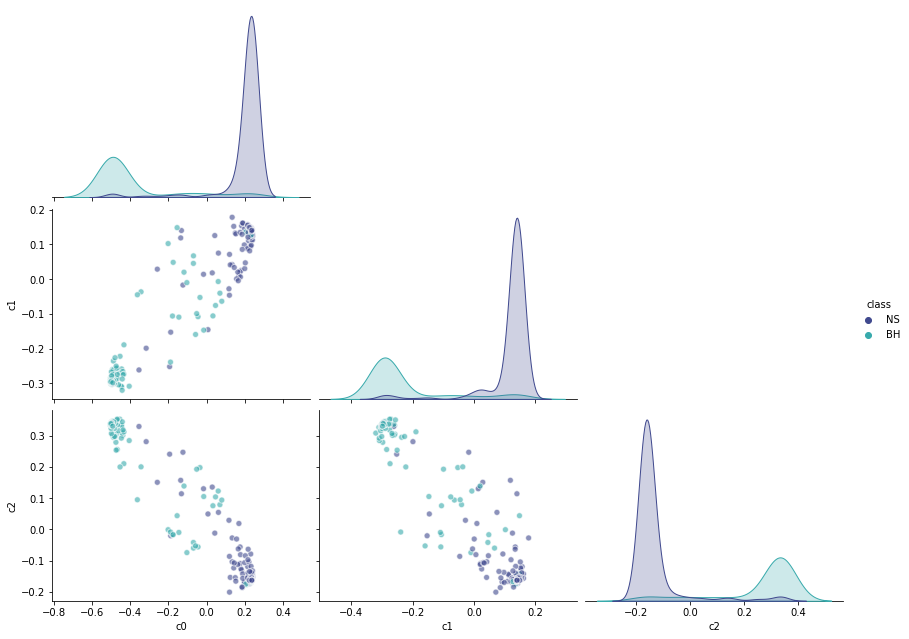

In [6]:
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns
from IPython.display import display

df= pd.read_csv('result/rf_clustering.csv' , index_col=0)
df.to_csv('../processed_data/rf_clustered_3d.csv')
#display(df)
plt.figure(figsize=(6,6))
sns.pairplot(
    data = df , 
    #x = 'c1' , 
    kind='scatter' ,  
    hue='class', 
    height=3 , aspect=8/6 , 
    plot_kws=dict(marker="o", linewidth=1 , alpha=0.6),
    palette='mako' , corner=True
)
plt.show()


In [4]:
df

,class,c0,c1,c2
index,,,,
0,NS,0.236949,0.140368,-0.162519
1,BH,-0.443973,-0.309915,0.326120
2,NS,0.215927,0.155337,-0.148353
3,NS,0.183507,0.153374,-0.130772
4,NS,0.217804,0.091383,-0.167727
...,...,...,...,...
455,NS,0.225645,0.081193,-0.134441
456,BH,-0.501044,-0.295349,0.337826
457,NS,0.223751,0.148751,-0.162723


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [129]:
train_acc = []
test_acc = []
best_clf = ''
score = 0 
for i in range(32):
    rs = int(np.random.uniform(10 , 99999))
    np.random.seed(rs)
    #np.random.seed(4433)
    df = df.sample(frac=1)
    x = df.drop(['class'] , axis=1)
    y = df['class']
    x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.2 , shuffle=True, random_state=10 , )
    clf = RandomForestClassifier(n_estimators=300 , criterion='entropy' , random_state=2)
    clf.fit(x_train , y_train)
    tr = clf.score(x_train , y_train)
    next_score = clf.score(x_test , y_test)
    if(next_score > score):
        best_clf = clf
        score = next_score
        print('better found')
    print(next_score , score)
    #print('\n -----------------')
    #print(rs , tst)
    ##train_acc.append(tr)
    #test_acc.append(tst)

better found
0.9456521739130435 0.9456521739130435
better found
0.9565217391304348 0.9565217391304348
0.9347826086956522 0.9565217391304348
better found
0.9891304347826086 0.9891304347826086
0.9565217391304348 0.9891304347826086
0.9021739130434783 0.9891304347826086
0.9782608695652174 0.9891304347826086
0.9239130434782609 0.9891304347826086
0.9456521739130435 0.9891304347826086
0.9021739130434783 0.9891304347826086
0.9239130434782609 0.9891304347826086
0.9456521739130435 0.9891304347826086
0.9347826086956522 0.9891304347826086
0.9565217391304348 0.9891304347826086
0.9456521739130435 0.9891304347826086
0.9456521739130435 0.9891304347826086
0.9239130434782609 0.9891304347826086
0.9021739130434783 0.9891304347826086
0.9239130434782609 0.9891304347826086
0.9347826086956522 0.9891304347826086
0.9565217391304348 0.9891304347826086
0.9130434782608695 0.9891304347826086
0.9239130434782609 0.9891304347826086
0.9347826086956522 0.9891304347826086
0.8913043478260869 0.9891304347826086
0.913043478